In [1]:
# Magic function
%matplotlib inline

# Dependencies
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
from scipy import stats

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

# Reflect Tables into SQLAlchemy ORM

In [2]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=True)

In [3]:
# reflect an existing database into a new model
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

2023-01-11 21:38:11,667 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2023-01-11 21:38:11,667 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-01-11 21:38:11,668 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("measurement")
2023-01-11 21:38:11,668 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-01-11 21:38:11,670 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'
2023-01-11 21:38:11,670 INFO sqlalchemy.engine.Engine [raw sql] ('measurement',)
2023-01-11 21:38:11,671 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_key_list("measurement")
2023-01-11 21:38:11,671 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-01-11 21:38:11,672 INFO sqlalchemy.engine.Engine PRAGMA temp.foreign_key_list("measurement")
2023-01-11 21:38:11,672 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-01-11 21:38:11,673 INFO sqlalchemy.engine.Engine SELECT sql

In [4]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [5]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [6]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [7]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [8]:
# Using the inspector to print the column names within the 'measurement' table and its types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

2023-01-11 21:38:16,094 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("measurement")
2023-01-11 21:38:16,099 INFO sqlalchemy.engine.Engine [raw sql] ()
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
# Using the inspector to print the column names within the 'station' table and its types
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

2023-01-11 21:38:19,914 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("station")
2023-01-11 21:38:19,920 INFO sqlalchemy.engine.Engine [raw sql] ()
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date

2023-01-11 21:38:28,140 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-01-11 21:38:28,151 INFO sqlalchemy.engine.Engine SELECT measurement.date AS measurement_date 
FROM measurement ORDER BY measurement.date DESC
 LIMIT ? OFFSET ?
2023-01-11 21:38:28,152 INFO sqlalchemy.engine.Engine [generated in 0.00096s] (1, 0)


('2017-08-23',)

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database 

# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=364)
query_date

datetime.date(2016, 8, 24)

In [12]:
# Perform a query to retrieve the data and precipitation scores between 2017-08-23 & 2016-08-24
last_year_prcp= session.query(Measurement.date, Measurement.prcp).\
            filter(Measurement.date >= '2016-08-23').all()
last_year_prcp

2023-01-11 21:38:33,291 INFO sqlalchemy.engine.Engine SELECT measurement.date AS measurement_date, measurement.prcp AS measurement_prcp 
FROM measurement 
WHERE measurement.date >= ?
2023-01-11 21:38:33,295 INFO sqlalchemy.engine.Engine [generated in 0.00474s] ('2016-08-23',)


[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [13]:
# Save the query results as a Pandas DataFrame and set the index to the date column
last_year_prcp_df = pd.DataFrame(last_year_prcp)
last_year_prcp_df = last_year_prcp_df.set_index("date")
last_year_prcp_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [14]:
# Sort the dataframe by date
sort_prcp_df = last_year_prcp_df.sort_values(by = "date")
sort_prcp_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


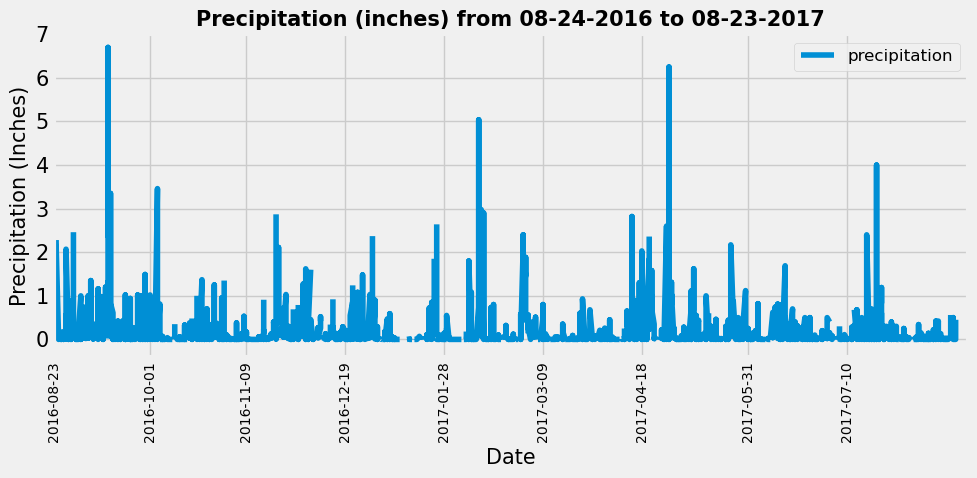

In [24]:
# Use Pandas Plotting with Matplotlib to plot the data

# Define the plot and plot the chart
plt.figure(figsize=(10, 5))
plt.plot(sort_prcp_df.index, sort_prcp_df['prcp'])

# Format the legend 
plt.legend(['precipitation'], loc="upper right",fontsize=12)

# Format xtick location
x_tick_loc = ["2016-08-23", 
        "2016-10-01", 
        "2016-11-09", 
        "2016-12-19", 
        "2017-01-28", 
        "2017-03-09", 
        "2017-04-18",
        "2017-05-31",
        "2017-07-10"] 

# Assign xticks
plt.xticks(x_tick_loc, rotation='vertical',fontsize=10)

# Set Labels & Title
plt.xlabel('Date', fontsize=15)
plt.ylabel("Precipitation (Inches)",fontsize=15)
plt.title(f"Precipitation (inches) from 08-24-2016 to 08-23-2017",fontsize=15, fontweight = 'bold')
plt.yticks(size=15)

# Asign xlim and ylim
plt.xlim(0,370)
plt.ylim(-0.4,7)

# Save Figure
plt.savefig("Precipitation_Plot.png")
plt.tight_layout()

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sort_prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number stations in the dataset
session.query(Station.id).count()

2023-01-11 21:38:48,261 INFO sqlalchemy.engine.Engine SELECT count(*) AS count_1 
FROM (SELECT station.id AS station_id 
FROM station) AS anon_1
2023-01-11 21:38:48,262 INFO sqlalchemy.engine.Engine [generated in 0.00197s] ()


9

In [18]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
most_act_stn = session.query(Measurement.station, func.count(Measurement.station)) \
                    .group_by(Measurement.station) \
                    .order_by(func.count(Measurement.station) \
                    .desc()) \
                    .first()

# List the stations and the counts in descending order.
most_act_stn

2023-01-11 21:38:52,243 INFO sqlalchemy.engine.Engine SELECT measurement.station AS measurement_station, count(measurement.station) AS count_1 
FROM measurement GROUP BY measurement.station ORDER BY count(measurement.station) DESC
 LIMIT ? OFFSET ?
2023-01-11 21:38:52,246 INFO sqlalchemy.engine.Engine [generated in 0.00392s] (1, 0)


('USC00519281', 2772)

In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)]
session.query(*sel).filter(Measurement.station == "USC00519281").all()

2023-01-11 21:39:02,481 INFO sqlalchemy.engine.Engine SELECT min(measurement.tobs) AS min_1, max(measurement.tobs) AS max_1, avg(measurement.tobs) AS avg_1 
FROM measurement 
WHERE measurement.station = ?
2023-01-11 21:39:02,483 INFO sqlalchemy.engine.Engine [generated in 0.00168s] ('USC00519281',)


[(54.0, 85.0, 71.66378066378067)]

2023-01-11 21:53:59,024 INFO sqlalchemy.engine.Engine SELECT measurement.date AS measurement_date, measurement.tobs AS measurement_tobs 
FROM measurement 
WHERE measurement.date >= ? AND measurement.station = ?
2023-01-11 21:53:59,025 INFO sqlalchemy.engine.Engine [cached since 894.7s ago] ('2016-08-23', 'USC00519281')


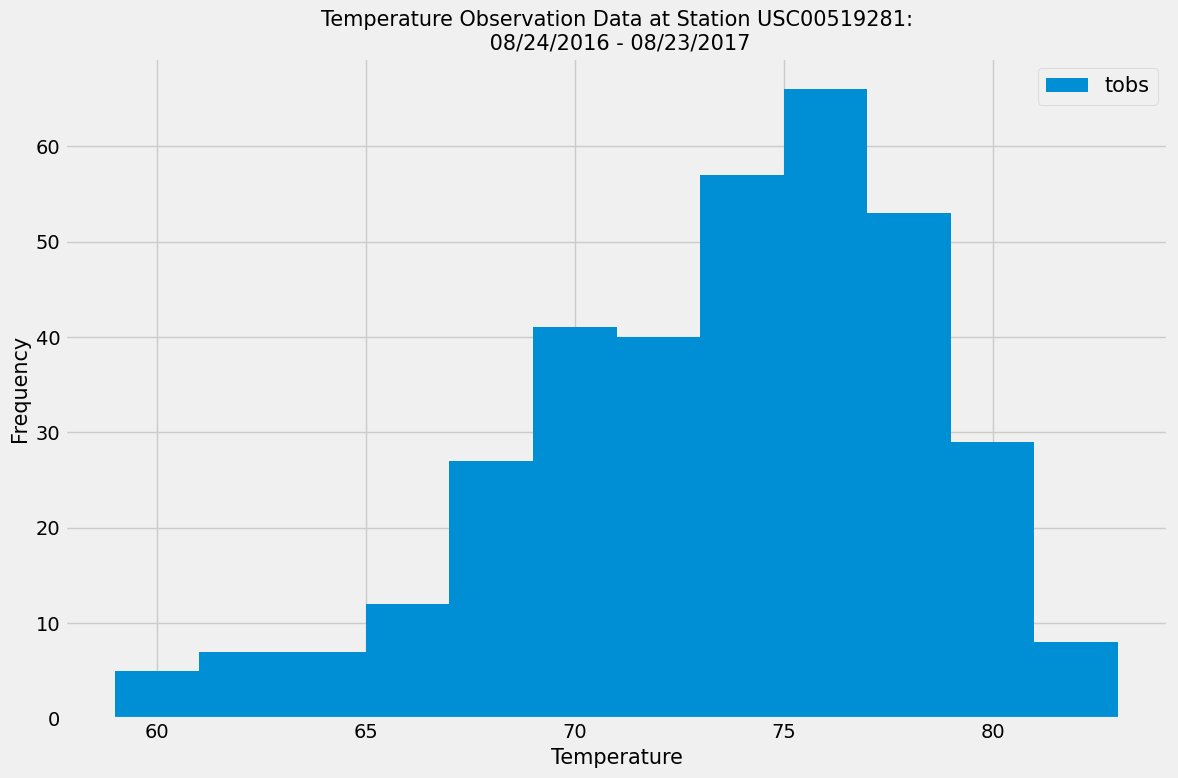

In [23]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_active_stn = (session.query(Measurement.date, (Measurement.tobs)) \
                .filter(Measurement.date >= '2016-08-23') \
                .filter(Measurement.station=='USC00519281') \
                .all())
# last_year_prcp_df.head()

# Create Data Frame
temp_df = pd.DataFrame(temp_active_stn)
temp_df.set_index('date', inplace=True)
# temp_df.head()

# Plot the histogram for 12-month period
plt.figure(figsize=(12,8))
plt.hist(temp_df['tobs'], bins=12)

# Format the legend 
plt.legend(['tobs'], loc="upper right",fontsize=15)

# Set Labels & Title
plt.title("Temperature Observation Data at Station USC00519281:\n 08/24/2016 - 08/23/2017", fontsize=15)
plt.xlabel("Temperature", fontsize=15)
plt.ylabel("Frequency", fontsize=15)


# Save Figure
plt.savefig("station_Plot.png")
plt.tight_layout()

# Close session

In [21]:
# Close Session
session.close()

2023-01-11 21:39:08,826 INFO sqlalchemy.engine.Engine ROLLBACK
